In [12]:
import pandas as pd
import pathlib as path
import matplotlib 
import ast 
from pprint import pprint 



In [13]:
cleaned_metadata_df = pd.read_csv("Resources/cleaned_movie_data.csv")

cleaned_metadata_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
0,0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116432,93487,0,Action,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116433,93488,0,Drama,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116434,93489,0,Thriller,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116435,93490,0,NaN,227506,tt0008536,0.003503,Russia,0.0,Satan Triumphant,0.0,0.0


In [35]:
cleaned_metadata_df = cleaned_metadata_df[(cleaned_metadata_df !=0).all(axis=1)]

cleaned_metadata_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
5,5,65000000,Family,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116311,93383,2000000,Drama,63281,tt1718881,0.121844,Russia,1268793.0,Pro Lyuboff,4.0,3.0
116330,93400,5000000,Action,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116331,93401,5000000,Comedy,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116332,93402,5000000,Crime,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0


In [36]:
# Original Question 7 -  What is the average IMDb rating of movies with a specific keyword in their plot (e.g., "alien")?

# New Question 7 - Which genres generate the highest average revenue?

revenue_by_genre_df = cleaned_metadata_df.groupby("Genres")["Revenue"].mean().reset_index()

revenue_by_genre_df = revenue_by_genre_df.rename(columns={"Revenue": "Average Revenue by Genre"})

In [37]:

revenue_by_genre_df = revenue_by_genre_df.sort_values(by="Average Revenue by Genre", ascending=False).reset_index()

revenue_by_genre_df 

,index,Genres,Average Revenue by Genre
0,1,Adventure,2.024051e+08
1,8,Fantasy,1.979628e+08
2,2,Animation,1.941754e+08
3,7,Family,1.914142e+08
4,15,Science Fiction,1.488569e+08
5,0,Action,1.444742e+08
6,17,Thriller,8.991798e+07
7,13,Mystery,8.257412e+07
8,3,Comedy,8.133823e+07
9,18,War,8.062990e+07


In [39]:
del revenue_by_genre_df["index"]

revenue_by_genre_df

,Genres,Average Revenue by Genre
0,Adventure,2.024051e+08
1,Fantasy,1.979628e+08
2,Animation,1.941754e+08
3,Family,1.914142e+08
4,Science Fiction,1.488569e+08
5,Action,1.444742e+08
6,Thriller,8.991798e+07
7,Mystery,8.257412e+07
8,Comedy,8.133823e+07
9,War,8.062990e+07


In [48]:
revenue_by_genre_df["Average Revenue by Genre"] = round(revenue_by_genre_df["Average Revenue by Genre"], 1)

revenue_by_genre_df

,Genres,Average Revenue by Genre
0,Adventure,202405064.6
1,Fantasy,197962826.4
2,Animation,194175414.1
3,Family,191414211.8
4,Science Fiction,148856896.9
5,Action,144474234.8
6,Thriller,89917976.7
7,Mystery,82574121.2
8,Comedy,81338226.9
9,War,80629896.7


In [44]:
import matplotlib.pyplot as plt

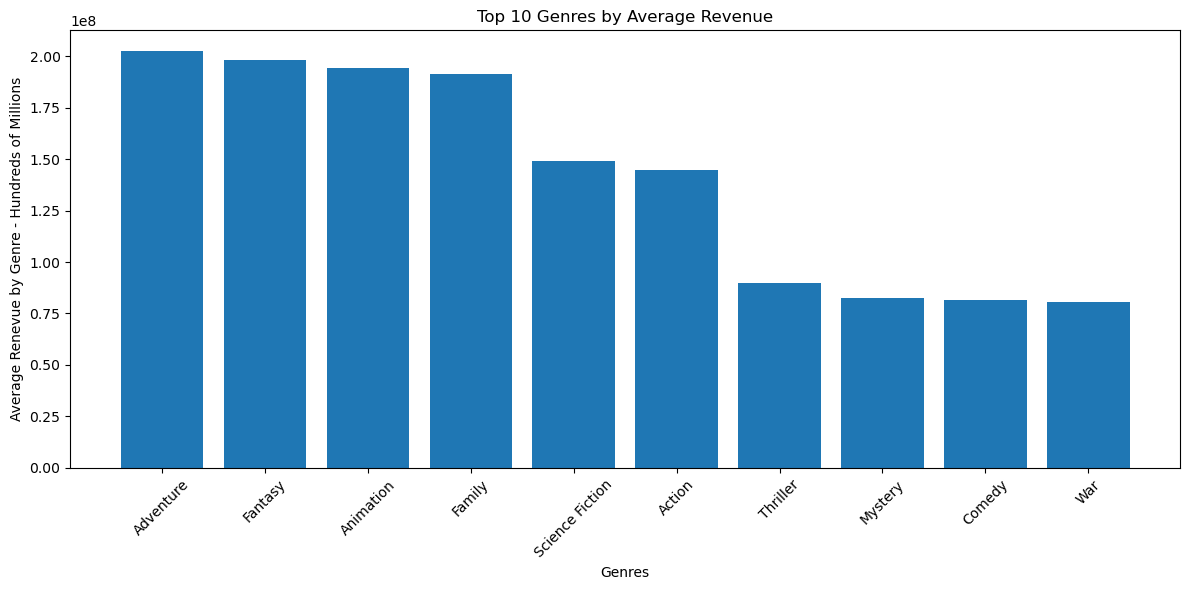

In [47]:
# Create a bar chart to visualize the average revenue generated by each genre.

avg_revenues_by_genre_df = revenue_by_genre_df.head(10)

plt.figure(figsize = (12,6))
plt.bar(avg_revenues_by_genre_df["Genres"], (avg_revenues_by_genre_df["Average Revenue by Genre"]))
plt.xlabel("Genres")
plt.ylabel("Average Renevue by Genre - Hundreds of Millions")
plt.title("Top 10 Genres by Average Revenue")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()